## Compare difference between ERA5 and ERA-Interim for ENSO events, based on ONI

### Use the 1x1 grid to make comparison

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import xarray as xr
#import cartopy.crs as ccrs
#import plot_func as f

In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
#path = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/'
path = '/Users/johannemehren/Desktop/filer'

#path_remap = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/remap/'

ds = xr.open_dataset(path + 'FULL-ERA5.monthmean.2007-2018.concat_new.nc')
ds2 = xr.open_dataset(path_remap+ 'erai.tp.monmean.gridera.nc')

In [4]:
era5_trop = ds.sel(lat=slice(-30,30))
erai_trop = ds2.sel(lat=slice(-30,30), time=slice('2006-01-01', '2018-12-31'))

In [5]:
ds2

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 487)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T09:00:00 ... 2019-08-16T09:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    ctpp     (time, lat, lon) float32 ...
    ctpt     (time, lat, lon) float32 ...
    tpp      (time, lat, lon) float32 ...
    tpt      (time, lat, lon) float32 ...
    tpz      (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.6 (http://m...
    Conventions:               CF-1.6
    history:                   Wed Mar 04 19:55:35 2020: cdo remapdis,gridfil...
    title:                     ERA-Interim tropopause pressure, temperature, ...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.9.1 (Homepage = htt...
    CDO:                       Climate Data Operators version 1.9.6 (http://m...

In [10]:
nina07_era5 = era5_trop.sel(time=slice('2007-10-01', '2008-03-01'))
nina10_era5 = era5_trop.sel(time=slice('2010-10-01', '2011-03-01'))
nina17_era5 = era5_trop.sel(time=slice('2017-10-01', '2018-03-01'))

nino09_era5 = era5_trop.sel(time=slice('2009-10-01', '2010-03-01'))
nino15_era5 = era5_trop.sel(time=slice('2015-10-01', '2016-03-01'))

neau_era5 = era5_trop.sel(time=slice('2012-10-01', '2014-11-01'))

In [11]:
nina07_erai = erai_trop.sel(time=slice('2007-10-01', '2008-03-01'))
nina10_erai = erai_trop.sel(time=slice('2010-10-01', '2011-03-01'))
nina17_erai = erai_trop.sel(time=slice('2017-10-01', '2018-03-01'))

nino09_erai = erai_trop.sel(time=slice('2009-10-01', '2010-03-01'))
nino15_erai = erai_trop.sel(time=slice('2015-10-01', '2016-03-01'))

neau_erai = erai_trop.sel(time=slice('2012-10-01', '2014-11-01'))

In [24]:
diff_neau_14 = neau_era5.ctpt[-7:,:,:] - neau_erai.ctpt[-7:,:,:].values
diff_neau_14_lrt = neau_era5.tpt[-7:,:,:] - neau_erai.tpt[-7:,:,:].values

In [31]:
diff_nina07 = nina07_era5.ctpt[1:4,:,:] - nina07_erai.ctpt[1:4,:,:].values
diff_nina10 = nina10_era5.ctpt[1:4,:,:] - nina10_erai.ctpt[1:4,:,:].values
diff_nina17 = nina17_era5.ctpt[1:4,:,:] - nina17_erai.ctpt[1:4,:,:].values

diff_neau = neau_era5.ctpt[1:4,:,:] - neau_erai.ctpt[1:4,:,:].values
diff_neau_lrt = neau_era5.tpt[1:4,:,:] - neau_erai.tpt[1:4,:,:].values

diff_nino09 = nino09_era5.ctpt[1:4,:,:] - nino09_erai.ctpt[1:4,:,:].values
diff_nino15 = nino15_era5.ctpt[1:4,:,:] - nino15_erai.ctpt[1:4,:,:].values

/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/enso/plot_func.py:111: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


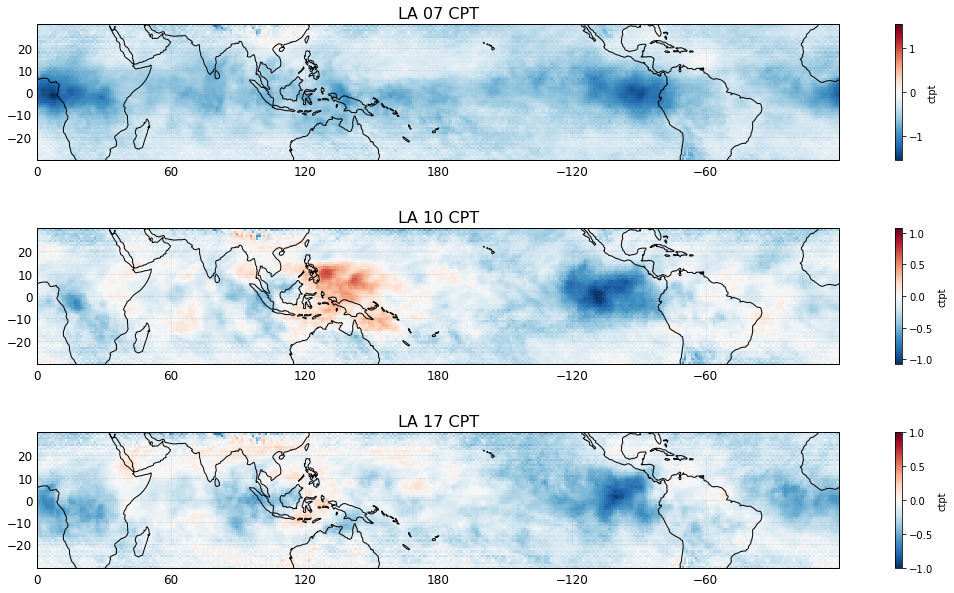

In [9]:
ds1 = diff_nina07.mean(axis=0)
ds2 = diff_nina10.mean(axis=0)
ds3 = diff_nina17.mean(axis=0)
tl1 = 'LA 07 CPT'
tl2 = 'LA 10 CPT'
tl3 = 'LA 17 CPT'
vmin2 = -1
vmax2 = 1

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, enso=True)



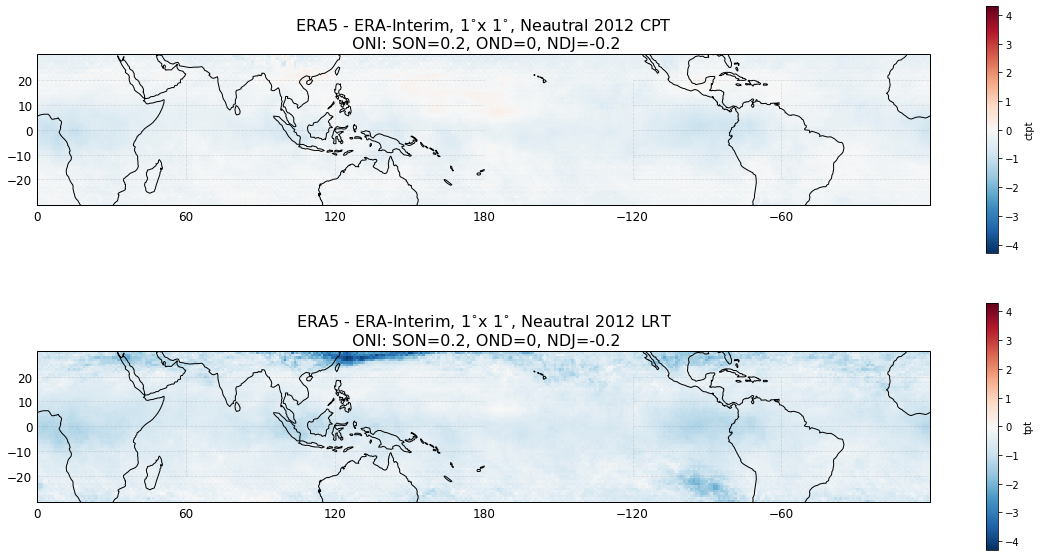

In [33]:
neau1_cpt = diff_neau.mean(axis=0)
neau1_lrt = diff_neau_lrt.mean(axis=0)
tl1 = 'ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$, Neautral 2012 CPT \n ONI: SON=0.2, OND=0, NDJ=-0.2'
tl2 = 'ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$, Neautral 2012 LRT \n ONI: SON=0.2, OND=0, NDJ=-0.2'

rr = f.enso_maxmin(neau1_cpt, tl1, neau1_lrt, tl2, vmin=-4.3, vmax=4.3)

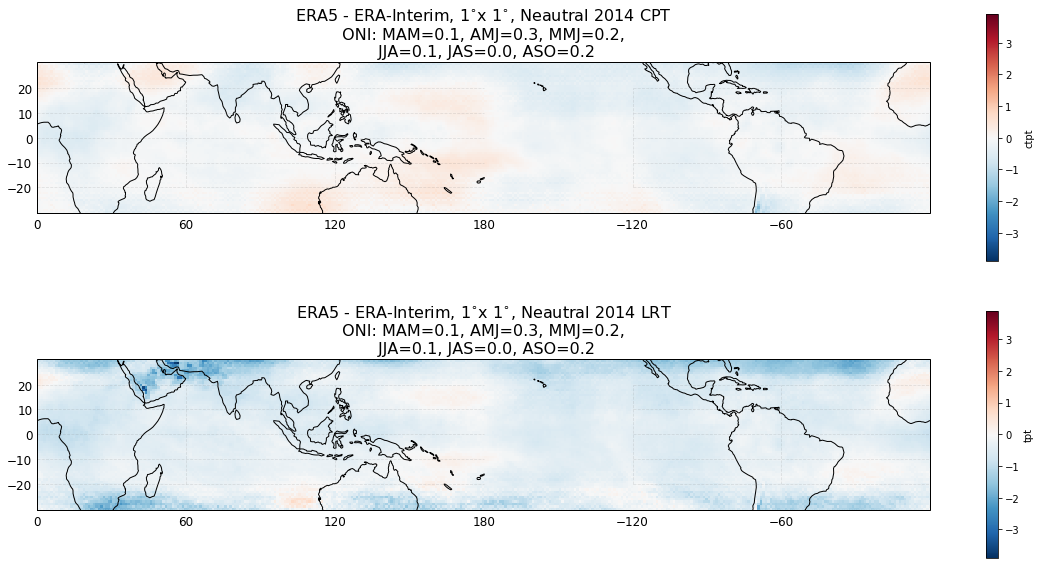

In [32]:
neau1_cpt = diff_neau_14.mean(axis=0)
neau1_lrt = diff_neau_14_lrt.mean(axis=0)
tl1 = 'ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$, Neautral 2014 CPT \n ONI: MAM=0.1, AMJ=0.3, MMJ=0.2, \n JJA=0.1, JAS=0.0, ASO=0.2'
tl2 = 'ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$, Neautral 2014 LRT \n ONI: MAM=0.1, AMJ=0.3, MMJ=0.2, \n JJA=0.1, JAS=0.0, ASO=0.2'

rr = f.enso_maxmin(neau1_cpt, tl1, neau1_lrt, tl2, vmin=-3.9, vmax=3.9)

In [ ]:
nino_diff = f.en